Mean Squared Error: 4615534434.403149


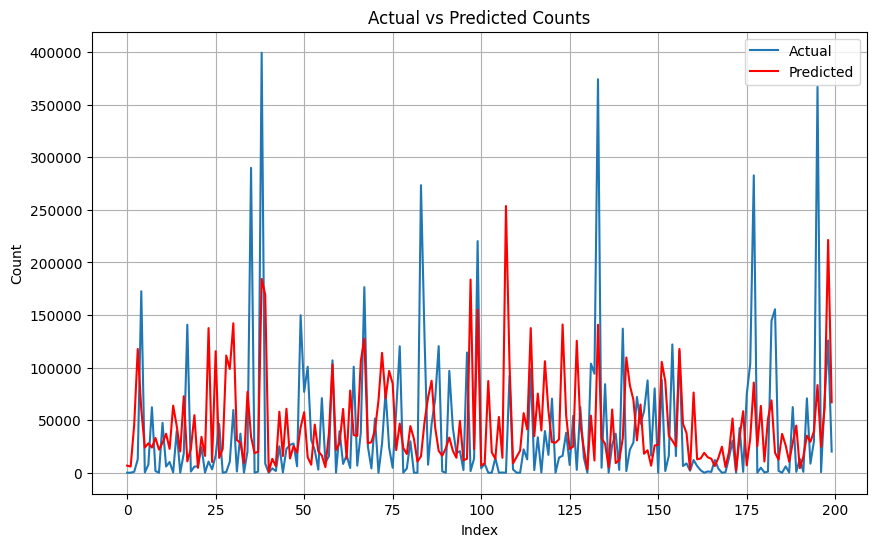

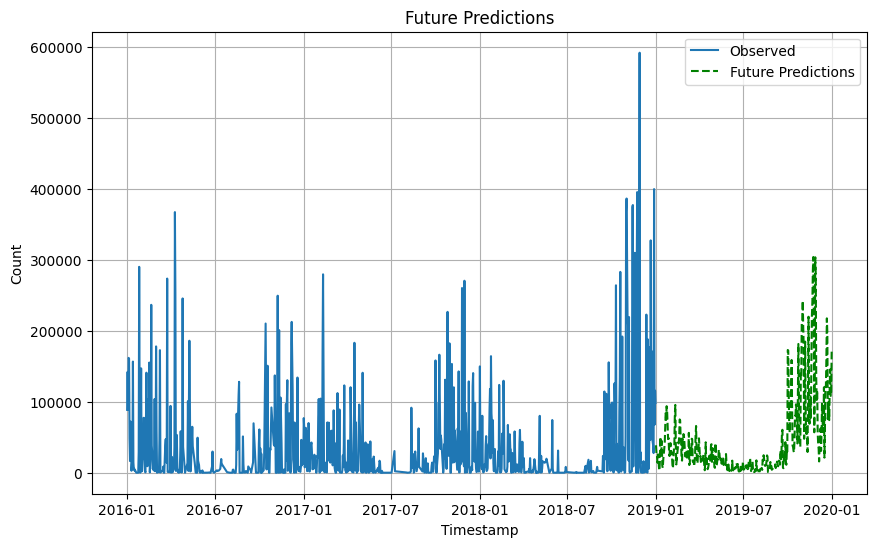

     timestamp  year  month  day  dayofweek  predicted_count
0   2019-01-01  2019      1    1          1         38628.75
1   2019-01-02  2019      1    2          2         26525.83
2   2019-01-03  2019      1    3          3         25113.54
3   2019-01-04  2019      1    4          4         14193.50
4   2019-01-05  2019      1    5          5         25920.15
..         ...   ...    ...  ...        ...              ...
360 2019-12-27  2019     12   27          4        126771.98
361 2019-12-28  2019     12   28          5        145559.56
362 2019-12-29  2019     12   29          6        108202.93
363 2019-12-30  2019     12   30          0        112552.61
364 2019-12-31  2019     12   31          1        172591.37

[365 rows x 6 columns]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Paso 1: Cargar y preprocesar los datos
data_2016 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2016.csv')
data_2017 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2017.csv')
data_2018 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2018.csv')
# Combinar los datos en un solo DataFrame
data = pd.concat([data_2016, data_2017, data_2018])

# Convertir la columna 'timestamp' a datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])


# Generar características adicionales a partir de la fecha
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek

# Paso 2: Generar características adicionales
X = data[['year', 'month', 'day', 'dayofweek']]
y = data['count']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Paso 4: Entrenar un modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
predictions = model.predict(X_test)
error = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones vs el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Counts')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Paso 6: Realizar predicciones futuras
# Crear nuevas fechas para predicciones futuras
future_dates = pd.date_range(start=data['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=365, freq='D')
future_data = pd.DataFrame({
    'timestamp': future_dates,
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day,
    'dayofweek': future_dates.dayofweek
})

# Predecir valores futuros
future_predictions = model.predict(future_data[['year', 'month', 'day', 'dayofweek']])

# Visualizar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['count'], label='Observed')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='dashed', color='green')
plt.title('Future Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones futuras
future_data['predicted_count'] = future_predictions
print(future_data)


Mean Squared Error: 4035830576.2547927


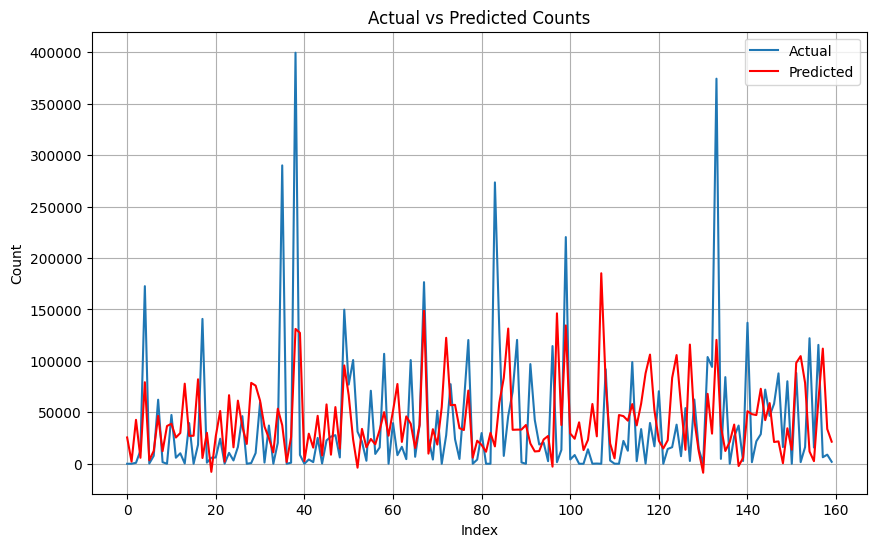

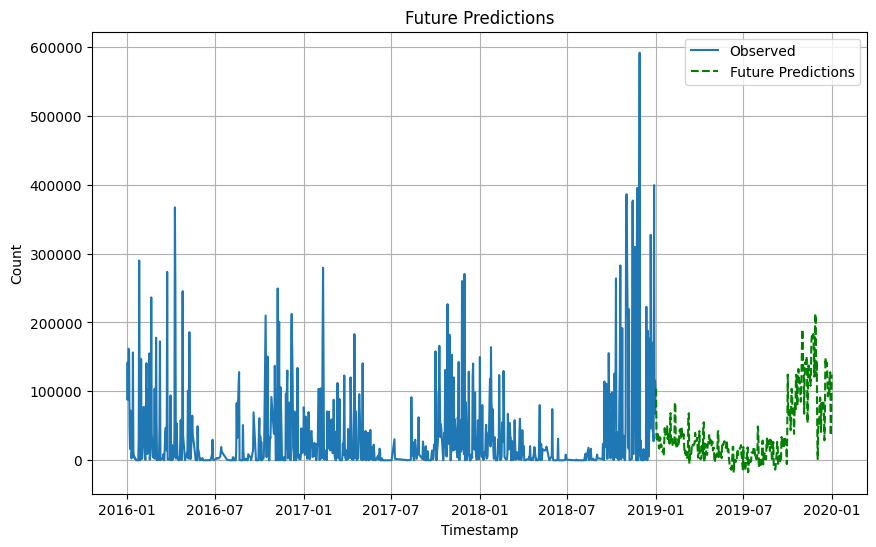

     timestamp  year  month  day  dayofweek  is_weekend  predicted_count
0   2019-01-01  2019      1    1          1           0    103837.503671
1   2019-01-02  2019      1    2          2           0     31774.179668
2   2019-01-03  2019      1    3          3           0     30343.835808
3   2019-01-04  2019      1    4          4           0     31573.838422
4   2019-01-05  2019      1    5          5           1     37661.962869
..         ...   ...    ...  ...        ...         ...              ...
360 2019-12-27  2019     12   27          4           0    123760.459477
361 2019-12-28  2019     12   28          5           1    127776.349006
362 2019-12-29  2019     12   29          6           1     36221.130881
363 2019-12-30  2019     12   30          0           0     63212.457809
364 2019-12-31  2019     12   31          1           0    124241.387506

[365 rows x 7 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Paso 1: Cargar y preprocesar los datos
data_2016 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2016.csv')
data_2017 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2017.csv')
data_2018 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2018.csv')
# Combinar los datos en un solo DataFrame
data = pd.concat([data_2016, data_2017, data_2018])

# Convertir la columna 'timestamp' a datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Generar características adicionales a partir de la fecha
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek
data['is_weekend'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Paso 2: Ingeniería de características
X = data[['year', 'month', 'day', 'dayofweek', 'is_weekend']]
y = data['count']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
predictions = model.predict(X_test)
error = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones vs el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Counts')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Paso 6: Realizar predicciones futuras
# Crear nuevas fechas para predicciones futuras
future_dates = pd.date_range(start=data['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=365, freq='D')
future_data = pd.DataFrame({
    'timestamp': future_dates,
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day,
    'dayofweek': future_dates.dayofweek,
    'is_weekend': future_dates.dayofweek.map(lambda x: 1 if x >= 5 else 0)
})

# Predecir valores futuros
future_data_scaled = scaler.transform(future_data[['year', 'month', 'day', 'dayofweek', 'is_weekend']])
future_predictions = model.predict(future_data_scaled)

# Visualizar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['count'], label='Observed')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='dashed', color='green')
plt.title('Future Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones futuras
future_data['predicted_count'] = future_predictions
print(future_data)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mean Squared Error: 4452764399.226793


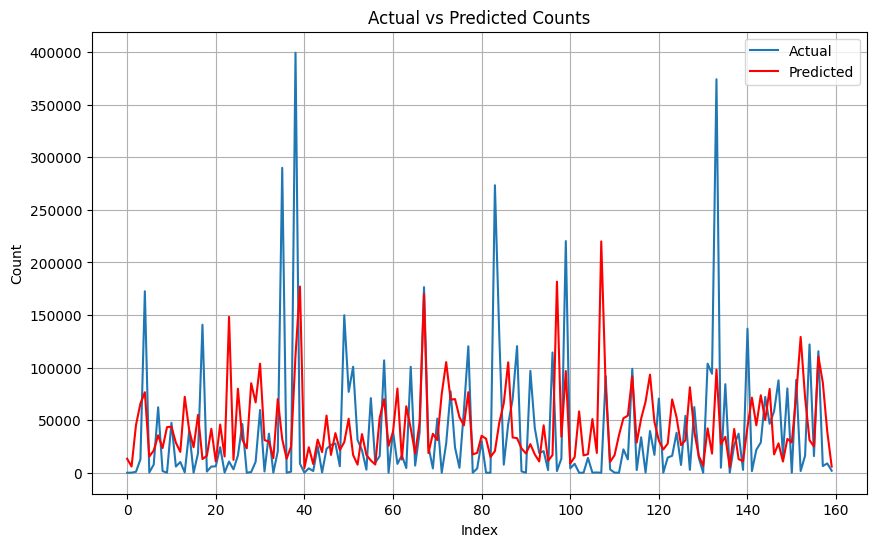

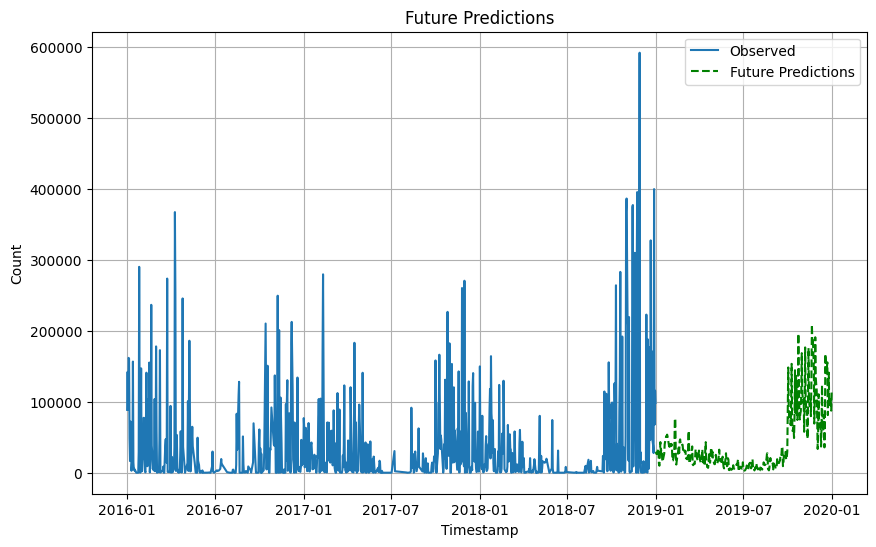

     timestamp  year  month  day  dayofweek  predicted_count
0   2019-01-01  2019      1    1          1     29624.472220
1   2019-01-02  2019      1    2          2     26355.703721
2   2019-01-03  2019      1    3          3     27716.511907
3   2019-01-04  2019      1    4          4     27283.748290
4   2019-01-05  2019      1    5          5     33978.012122
..         ...   ...    ...  ...        ...              ...
360 2019-12-27  2019     12   27          4    106501.532909
361 2019-12-28  2019     12   28          5    105015.243469
362 2019-12-29  2019     12   29          6    104688.974924
363 2019-12-30  2019     12   30          0     87419.136369
364 2019-12-31  2019     12   31          1    114783.119056

[365 rows x 6 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Paso 1: Cargar y preprocesar los datos
data_2016 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2016.csv')
data_2017 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2017.csv')
data_2018 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2018.csv')
# Combinar los datos en un solo DataFrame
data = pd.concat([data_2016, data_2017, data_2018])

# Convertir la columna 'timestamp' a datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Generar características adicionales a partir de la fecha
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek

# Paso 2: Generar características adicionales
X = data[['year', 'month', 'day', 'dayofweek']]
y = data['count']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Ajustar hiperparámetros del modelo Random Forest Regressor con GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por GridSearchCV
best_rf = grid_search.best_estimator_

# Paso 5: Evaluar el modelo
predictions = best_rf.predict(X_test)
error = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones vs el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Counts')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Paso 6: Realizar predicciones futuras
# Crear nuevas fechas para predicciones futuras
future_dates = pd.date_range(start=data['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=365, freq='D')
future_data = pd.DataFrame({
    'timestamp': future_dates,
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day,
    'dayofweek': future_dates.dayofweek
})

# Predecir valores futuros
future_predictions = best_rf.predict(future_data[['year', 'month', 'day', 'dayofweek']])

# Visualizar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['count'], label='Observed')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='dashed', color='green')
plt.title('Future Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones futuras
future_data['predicted_count'] = future_predictions
print(future_data)